# **Sentiment Analysis of Amazon Product Reviews: Predicting Customer Satisfaction**

The core objective of the project, which involves analyzing and predicting the sentiment or satisfaction levels of customers based on their reviews of Amazon brand products.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import warnings
warnings.filterwarnings("ignore")

## **Week 1 and 2 Task:**

    1. Exploratory Data Analysis (EDA):
    2. Feature Engineering:
    3. Classifier Selection:
    4. Tackling Class Imbalance:
    5. Evaluation Metrics:



In [12]:
train=pd.read_csv('data/train_data.csv')
train.head()

,Name,Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [13]:
test_val=pd.read_csv('data/test_data_hidden.csv')
test_val.head()

,Name,Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [14]:
test= pd.read_csv("data/test_data.csv")
test.head()

,Name,Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


**1. Exploratory Data Analysis**

In [15]:
train.duplicated().sum()

58

In [16]:
test.duplicated().sum()

3

In [17]:
test_val.duplicated().sum()

3

From above it is clear that there are 58 duplicate record in train data and 3 duplicate record in test data.

In [18]:
train.drop_duplicates(inplace=True)

In [19]:
train.duplicated().sum()

0

In [20]:
train.shape

(3942, 8)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3942 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               3942 non-null   object
 1   Brand              3942 non-null   object
 2   categories         3942 non-null   object
 3   primaryCategories  3942 non-null   object
 4   reviews.date       3942 non-null   object
 5   reviews.text       3942 non-null   object
 6   reviews.title      3932 non-null   object
 7   sentiment          3942 non-null   object
dtypes: object(8)
memory usage: 277.2+ KB


In train data, reviews.title have 10 missing values.

For positive Sentiment

In [22]:
train[train.sentiment=='Positive'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
0,Purchased on Black FridayPros - Great Price (e...,Powerful tablet
1,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME
3,"very good product. Exactly what I wanted, and ...",Greattttttt
4,This is the 3rd one I've purchased. I've bough...,Very durable!
5,This is a great product. Light weight. I wish ...,You will love it
7,Purchased this for my son. Has room to upgrade...,Great for kids or smaller needs
8,Bought this for my mom and it was just what sh...,Great tablet
10,"I got this tablet to replace my sons old one, ...",Great Tablet
11,Great product for the kids gaming apps parenta...,Works great
12,Love the choice of colors. Have two kindles of...,great pad for both children and adults


In [23]:
train[train.sentiment=='Neutral'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
2,Just an average Alexa option. Does show a few ...,Average
6,My 7-year old daughter saved up to by this. He...,OK For Entry Level Tablet
17,"Not as good as before the old kindle, just sea...",Not as good as before
59,There is nothing spectacular about this item b...,"Does what it says, missing one key feature"
95,It's unfair for me to rate this product cause ...,Haven't set it up yet
114,I bought this as s present for my 65 year old ...,Solid tablet
146,Bought this tablet for 8 year old. It holding ...,Fire tablet
147,bought a few kindles in the past but this time...,Came defective
148,"Not a substitute for an iPad, but a really goo...",Good Reader
187,This device is a good if you are looking for a...,Good for 4 year old


In [24]:
train[train.sentiment=='Negative'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
9,"was cheap, can not run chrome stuff, returned ...","was cheap, can not run chrome stuff, returned"
97,"Worthless, except as a regular echo and a poor...",Useless screen so why pay for it?
104,Too bad Amazon turned this tablet into a big a...,Amazon Fire 7 Tablet
121,I bought this Kindle for my 7 year old grand-d...,Kid's Kindle
150,I am reading positive reviews and wish I could...,Have never purchased a more frustrating Device
151,I have to say it was a little confusing and fr...,not big fan
249,It's a good device for children because they d...,Good for kids
267,the speaker voice quality is terrible compare ...,"terrible product,bad voice quality"
368,Needs to be a stand alone device. I should hav...,Needs to be a stand alone device
530,Has a very good Bluetooth speakers sound quali...,Good Bluetooth speaker


In [25]:
train.sentiment.value_counts()

sentiment
Positive    3694
Neutral      158
Negative      90
Name: count, dtype: int64

# **Class Imbalance**
The data of training data set is imbalanced. As positive sentiments are 3694 out of 3942 which is around 94% of total data.

In [26]:
pd.DataFrame(train.Name.value_counts())

,count
Name,
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",340
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",122


In [27]:
train.Brand.value_counts()

Brand
Amazon    3942
Name: count, dtype: int64

In [28]:
train.primaryCategories.value_counts()

primaryCategories
Electronics                    2562
Electronics,Hardware           1159
Office Supplies,Electronics     204
Electronics,Media                17
Name: count, dtype: int64

In [29]:
pd.DataFrame(train.categories.value_counts())

,count
categories,
"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",628
"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants",514
"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital Device 3",483
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",446
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",340
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",294
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",231
"Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,Home,Mobile Speakers,TVs & Electronics,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Electronics Features,Frys,Speakers,Mobile,Digital Device 3,Smart Home,Home Improvement,Electronics, Tech Toys, Movies, Music,Smart Home & Home Automation Devices,Smart Hubs,MP3 Player Accessories,Home Safety & Security,Voice Assistants,Amazon Home,Alarms & Sensors,Portable Audio & Electronics,Amazon Devices,Audio,Bluetooth Speakers,MP3 Accessories,All Bluetooth & Wireless Speakers",177
"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Wireless Speakers,Smart Home,Home Improvement,Voice Assistants,Amazon Home,Amazon",162


In [30]:
train.dtypes

Name                 object
Brand                object
categories           object
primaryCategories    object
reviews.date         object
reviews.text         object
reviews.title        object
sentiment            object
dtype: object

# **Data Cleaning**

In [31]:
del train['Brand']
del test_val['Brand']
del test['Brand']

In [32]:
train['reviews.date'] = train['reviews.date'].str.split('T').str[0]
test_val['reviews.date'] = test_val['reviews.date'].str.split('T').str[0]
test['reviews.date'] = test['reviews.date'].str.split('T').str[0]

train['reviews_day'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.day
train['reviews_month'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.month
train['reviews_year'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.year

test_val['reviews_day'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.day
test_val['reviews_month'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.month
test_val['reviews_year'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.year

test['reviews_day'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.day
test['reviews_month'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.month
test['reviews_year'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.year

del train['reviews.date']
del test['reviews.date']
del test_val['reviews.date']

train.head()

,Name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,26,12,2016
1,Amazon - Echo Plus w/ Built-In Hub - Silver,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,17,1,2018
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Average,Neutral,20,12,2017
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...","eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Greattttttt,Positive,4,8,2017
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...","Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,23,1,2017


# **Label Encoding**

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
name = list(set(list(train['Name'])+list(test_val['Name'])))
categories = list( set( list( train['categories']) + list(test_val['categories'])))
primaryCategories = list(train['primaryCategories'].unique())

le_name = LabelEncoder()
le_cat = LabelEncoder()
le_pri = LabelEncoder()
le_name.fit(name)
le_cat.fit(categories)
le_pri.fit(primaryCategories)

train['name'] = le_name.transform(train.Name)
train['categories'] = le_cat.transform(train.categories)
train['primaryCategories'] = le_pri.transform(train.primaryCategories)
test_val['name'] = le_name.transform(test_val.Name)
test_val['categories'] = le_cat.transform(test_val.categories)
test_val['primaryCategories'] = le_pri.transform(test_val.primaryCategories)
test['name'] = le_name.transform(test.Name)
test['categories'] = le_cat.transform(test.categories)
test['primaryCategories'] = le_pri.transform(test.primaryCategories)

In [35]:
train['reviews.title'].fillna(value=' ',inplace=True)
test_val['reviews.title'].fillna(value=' ',inplace=True)
test['reviews.title'].fillna(value=' ',inplace=True)

In [36]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...


True

In [37]:
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud

In [38]:
tok = WordPunctTokenizer()
ps = PorterStemmer()
wnl = WordNetLemmatizer()
neg_dict = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}

neg_pattern = re.compile(r'\b(' + '|'.join(neg_dict.keys()) + r')\b')

In [39]:
def data_cleaner(text):
    text = text.replace(r"Äú",'')
    text = text.replace(r'Äù','')
    text = text.replace(r'‚Äô','\'')
    text = text.lower()
    text = text.replace(r'‚Äô','\'')
    text = neg_pattern.sub(lambda x: neg_dict[x.group()], text)
    text = re.sub("[^a-zA-Z0-9\"]", " ", text)
    word_tok=[x for x in tok.tokenize(text) if len(x) > 3]
    word_lem = [wnl.lemmatize(i) for i in word_tok]
    return (" ".join(word_lem).strip())

In [40]:
for i in (train,test_val,test):
    i['reviews.text']=i['reviews.text'].apply(data_cleaner)
    i['reviews.title']=i['reviews.title'].apply(data_cleaner)

In [41]:
test[['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
0,amazon kindle fire free used that want online ...,very handy device
1,echo show great addition amazon family work ju...,another winner from amazon
2,great value from best bought christmas sale,simple reliable
3,mine email facebook game line also have down l...,love
4,this fantastic item person bought love,fantastic
5,this great devise reading book taking photo be...,book reader
6,have enjoyed learning about home automation us...,first experience with alexa
7,nice size very clear randomly shuts cant remov...,great size
8,awesome product cool design great color would ...,great gift
9,love mine work great with prime have best movie,great


# **Visualization**

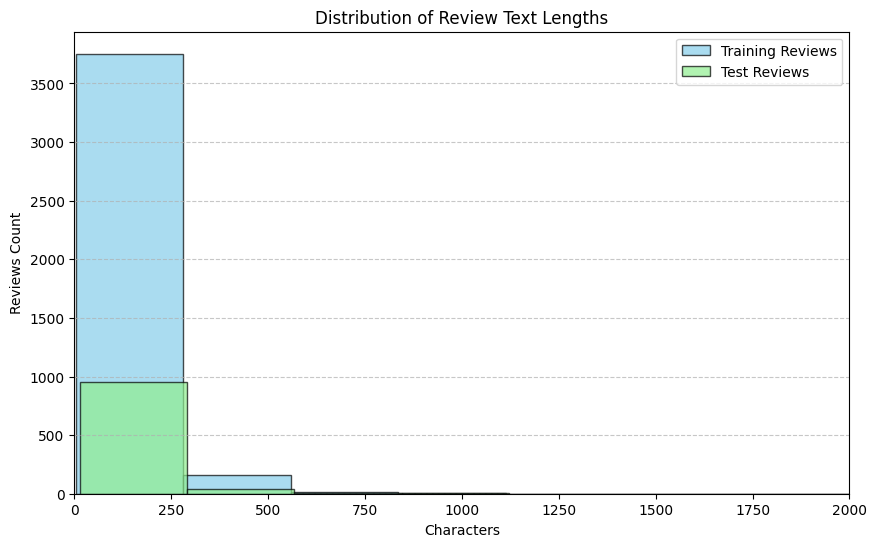

In [42]:
# Calculate the length of review texts in the training and test datasets
train_len = train["reviews.text"].str.len()
test_len = test["reviews.text"].str.len()

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the histograms for training and test reviews
plt.hist(train_len, bins=20, label="Training Reviews", alpha=0.7, color='skyblue', edgecolor='black')
plt.hist(test_len, bins=20, label="Test Reviews", alpha=0.7, color='lightgreen', edgecolor='black')

# Add legend
plt.legend()

# Set limits for the x-axis
plt.xlim(0, 2000)

# Label the axes
plt.xlabel('Characters')
plt.ylabel('Reviews Count')

# Set title for the plot
plt.title('Distribution of Review Text Lengths')

# Add grid lines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [43]:
all_text = ' '.join([text for text in train['reviews.text']])
pos_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Positive']])
neg_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Negative']])
neu_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Neutral']])

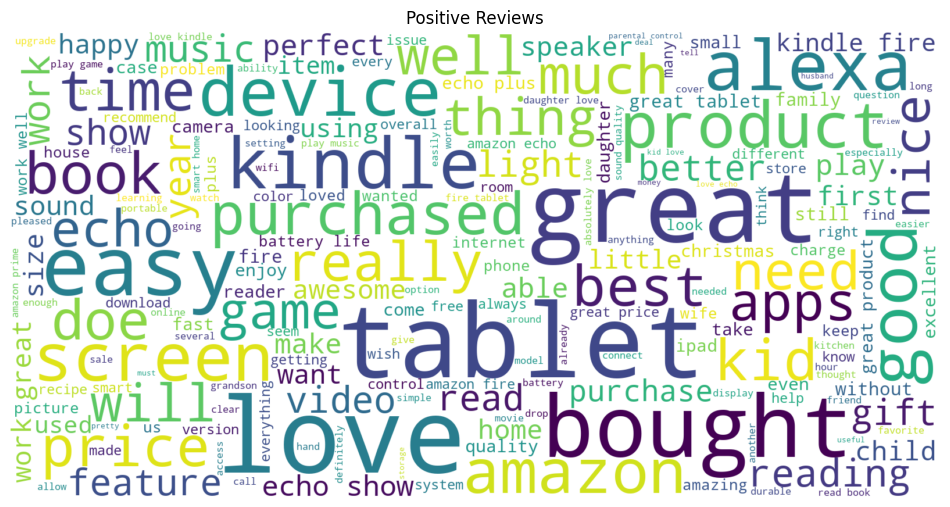

In [44]:
# Generate the word cloud
wordcloud = WordCloud(
    width=1600,
    height=800,
    random_state=21,
    max_font_size=180,
    min_font_size=10,
    background_color='white',
    colormap='viridis',
    max_words=200,
    stopwords=None
).generate(pos_text)

# Create the figure and axis
plt.figure(figsize=(12, 10))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')
plt.margins(x=0, y=0)

# Show the plot
plt.show()

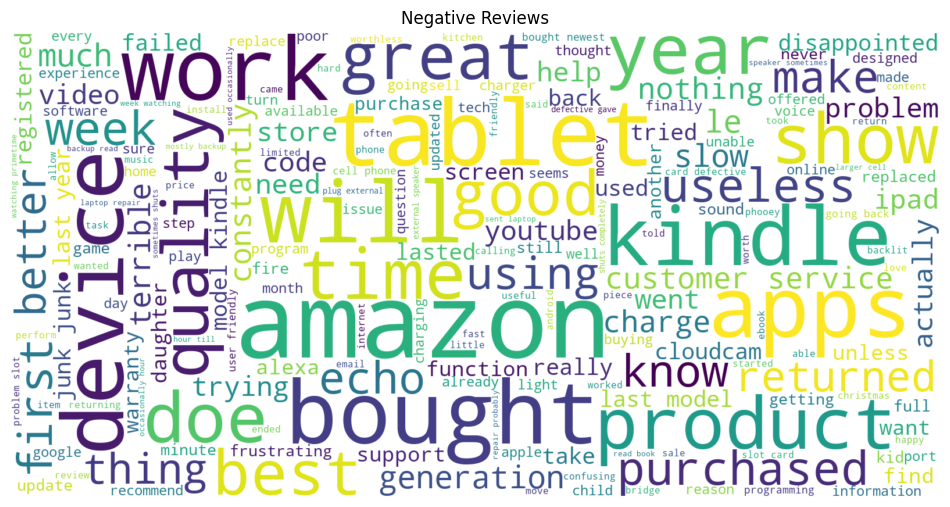

In [45]:
# Generate the word cloud
wordcloud = WordCloud(
    width=1600,
    height=800,
    random_state=21,
    max_font_size=180,
    min_font_size=10,
    background_color='white',
    colormap='viridis',
    max_words=200,
    stopwords=None
).generate(neg_text)

# Create the figure and axis
plt.figure(figsize=(12, 10))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')
plt.margins(x=0, y=0)

# Show the plot
plt.show()

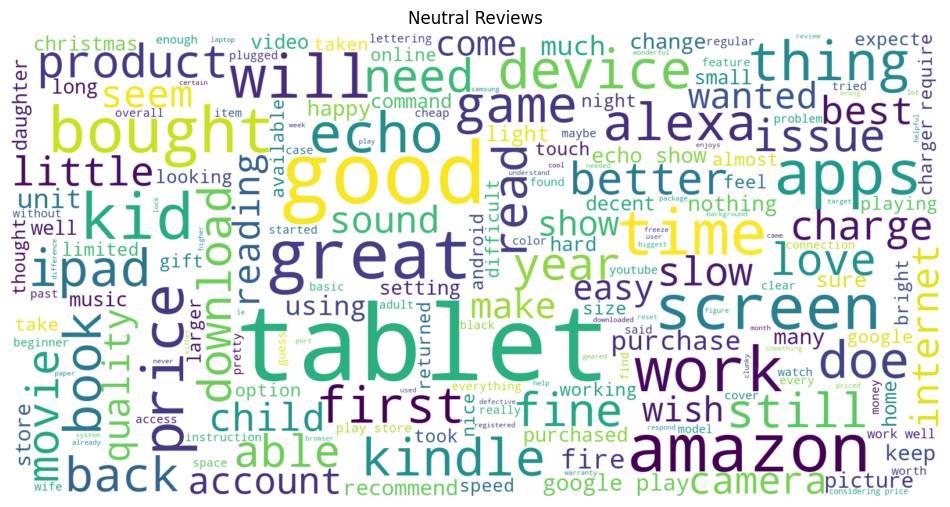

In [46]:
# Generate the word cloud
wordcloud = WordCloud(
    width=1600,
    height=800,
    random_state=21,
    max_font_size=180,
    min_font_size=10,
    background_color='white',
    colormap='viridis',
    max_words=200,
    stopwords=None
).generate(neu_text)

# Create the figure and axis
plt.figure(figsize=(12, 10))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Reviews')
plt.margins(x=0, y=0)

# Show the plot
plt.show()

In [47]:
le_senti = LabelEncoder()
train['sentiment'] = le_senti.fit_transform(train['sentiment'])
test_val['sentiment'] = le_senti.fit_transform(test_val['sentiment'])

In [48]:
train.head()

,Name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year,name
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",10,0,purchased black fridaypros great price even sa...,powerful tablet,2,26,12,2016,2
1,Amazon - Echo Plus w/ Built-In Hub - Silver,1,1,purchased amazon echo plus dot plus four fire ...,amazon echo plus awesome,2,17,1,2018,5
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,2,1,just average alexa option doe show thing scree...,average,1,20,12,2017,9
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",22,3,very good product exactly what wanted very goo...,greattttttt,2,4,8,2017,14
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",9,0,this purchased bought niece other case compare...,very durable,2,23,1,2017,13


# **TFIDF Vectorizer**

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split

In [50]:
tvec1 = TfidfVectorizer()
tvec2 = TfidfVectorizer()
tvec3 = TfidfVectorizer()

In [51]:
train1 = train.reset_index()
combi1=pd.concat([train1,test_val],axis=0,join='outer')

tvec1.fit(combi1['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train1['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(combi1['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train1['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train1 = pd.concat([train1.drop(['reviews.text','reviews.title','sentiment','index','Name'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val1 = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment','Name'],axis=1),tvec_text2, tvec_title2],axis=1)

x_train1=Train1.values
y_train1=train['sentiment'].values

x_val1=Test_Val1.values
y_val1 = test_val['sentiment'].values

In [52]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction import text

In [53]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

tvec3 = TfidfVectorizer(stop_words = list(stop_words), tokenizer = tokenize, max_features = 1000)

reviews=tvec3.fit_transform(combi1['reviews.text'])
words = tvec3.get_feature_names_out()

# **Multinomial Naive Bayes**

In [54]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score, recall_score,roc_curve, roc_auc_score, auc


In [55]:
X_train, X_val, y_train, y_val = train_test_split(train1['reviews.text'], train1['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Fit the Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict on the validation set
y_pred = nb.predict(X_val_tfidf)

# Evaluate the model
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)

[[  0   0  15]
 [  0   0  28]
 [  0   0 746]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        28
           2       0.95      1.00      0.97       746

    accuracy                           0.95       789
   macro avg       0.32      0.33      0.32       789
weighted avg       0.89      0.95      0.92       789

94.55006337135615


Positive sentiment is revealed as data is imbalanced.

# **Tackeling Imbalaced data**

In [56]:
train.sentiment.value_counts()

sentiment
2    3694
1     158
0      90
Name: count, dtype: int64

In [57]:
count_2, count_1, count_0 =train.sentiment.value_counts()
class_2 = train[train.sentiment==2]
class_1 = train[train.sentiment==1]
class_0 = train[train.sentiment==0]
count_2, count_1, count_0

(3694, 158, 90)

Undersampling the data

In [58]:
class_2_under = class_2.sample(count_1)
train_under= pd.concat([class_2_under,class_1,class_0],axis=0)
print(train_under.shape)
print(train_under.sentiment.value_counts())

(406, 10)
sentiment
2    158
1    158
0     90
Name: count, dtype: int64


Oversampling the data

In [59]:
class_0_over = class_0.sample(count_2,replace=True)
class_1_over = class_1.sample(count_2,replace=True)
train_over = pd.concat([class_2,class_0_over,class_1_over],axis=0)
print(train_over.shape)
print(train_over.sentiment.value_counts())

(11082, 10)
sentiment
2    3694
0    3694
1    3694
Name: count, dtype: int64


In [60]:
lr= LogisticRegression(C=30, class_weight='balanced', solver='sag',
                         multi_class='multinomial', n_jobs=6, random_state=40,
                         verbose=1, max_iter=1000)

# **TFIDF Vectorizer on under-sampled data**

In [61]:
train = train_under.reset_index(drop=True)
#combi = train.append(test_val,ignore_index=True)
combi=pd.concat([train,test_val],axis=0,join='outer')
print(combi.shape)

tvec1.fit(combi['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(combi['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment','Name'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment','Name'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
y_val = test_val['sentiment']

(1406, 10)


# **Logistic Regression on under-sampled data**

In [62]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


max_iter reached after 22 seconds
[[ 13   5   6]
 [ 15   8  16]
 [357 154 426]]
              precision    recall  f1-score   support

           0       0.03      0.54      0.06        24
           1       0.05      0.21      0.08        39
           2       0.95      0.45      0.62       937

    accuracy                           0.45      1000
   macro avg       0.34      0.40      0.25      1000
weighted avg       0.89      0.45      0.58      1000

accuracy :  44.7


In [63]:
from sklearn.preprocessing import LabelBinarizer

0.552096728162046


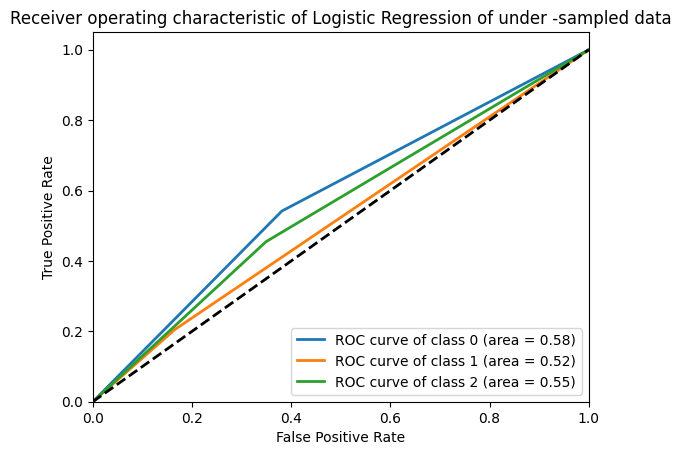

In [64]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression of under -sampled data')
plt.legend(loc="lower right")
plt.show()

# **TFIDF Vectorizer on over-sampled data**

In [65]:
train = train_over.reset_index(drop=True)

tvec1.fit(train['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(train['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment','Name'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment','Name'],axis=1),tvec_text2, tvec_title2],axis=1)

Train.to_csv('Train.csv',encoding='utf-8')
Test_Val.to_csv('Test_Val.csv',encoding='utf-8')

x_train=Train.values
y_train=train['sentiment'].values
x_val=Test_Val.values
y_val = test_val['sentiment'].values

# **Logistic Regression on over-sampled data**

In [66]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


max_iter reached after 857 seconds
[[ 14   2   8]
 [ 11   9  19]
 [225 148 564]]
              precision    recall  f1-score   support

           0       0.06      0.58      0.10        24
           1       0.06      0.23      0.09        39
           2       0.95      0.60      0.74       937

    accuracy                           0.59      1000
   macro avg       0.36      0.47      0.31      1000
weighted avg       0.90      0.59      0.70      1000

accuracy :  58.699999999999996


0.5867689418955178


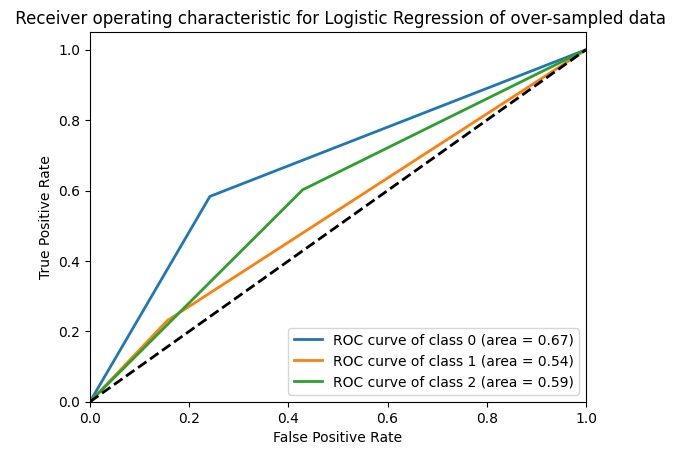

In [67]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic for Logistic Regression of over-sampled data')
plt.legend(loc="lower right")
plt.show()

Logistic Regression on over-sampled data is perfrorming better than under-sampled data

# **Multinomial Naive Bayes**

In [68]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

[[ 13   2   9]
 [  2  15  22]
 [ 10  72 855]]
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        24
           1       0.17      0.38      0.23        39
           2       0.97      0.91      0.94       937

    accuracy                           0.88      1000
   macro avg       0.55      0.61      0.57      1000
weighted avg       0.92      0.88      0.90      1000

88.3
0.9598447933585995
0.883


0.709319152110558


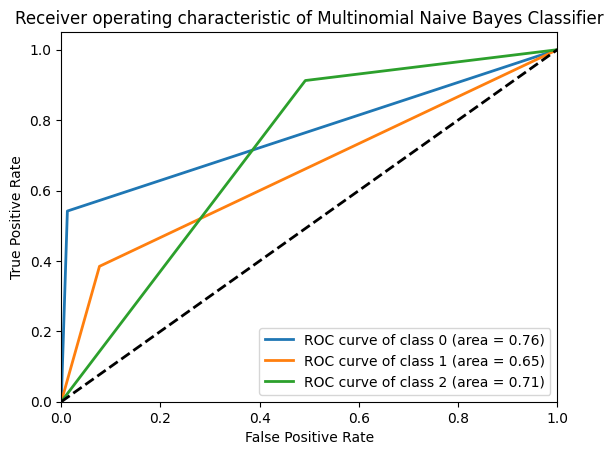

In [69]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Multinomial Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

# **Random Forest Classifier**

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf= RandomForestClassifier(n_estimators=400,random_state=10).fit(x_train,y_train)
y_pred=rf.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)
print(rf.score(x_train,y_train))
print(rf.score(x_val,y_val))

[[  7   0  17]
 [  0  10  29]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       1.00      0.26      0.41        39
           2       0.95      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.98      0.52      0.61      1000
weighted avg       0.96      0.95      0.94      1000

accuracy :  95.39999999999999
1.0
0.954


0.6349206349206349


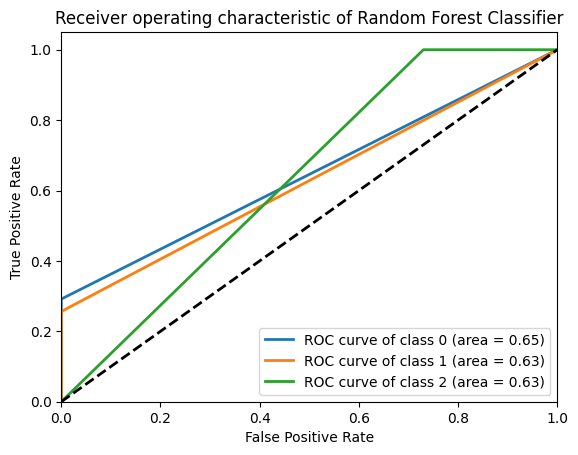

In [72]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# **XGBClassifier**

In [74]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 573.4 kB/s eta 0:03:38
   ---------------------------------------- 0.1/124.9 MB 573.4 kB/s eta 0:03:38
   ---------------------------------------- 0.2/124.9 MB 700.2 kB/s eta 0:02:59
   ---------------------------------------- 0.2/124.9 MB 808.4 kB/s eta 0:02:35
   ---------------------------------------- 0.3/124.9 MB 749.3 kB/s eta 0:02:47
   ---------------------------------------- 0.4/124.9 MB 928.4 kB/s eta 0:02:15
   ---------------------------------------- 0.4/124.9 MB 882.8 kB/s eta 0:02:22
   ---------------------------------------- 0.5/124.9 MB 1.1 MB/s eta 0:01:55
   ---------------------------------------- 0.5/124.9 MB 1.0 MB/s eta 0:02:03


In [75]:
from xgboost import XGBClassifier

In [76]:
xgb= XGBClassifier(n_estimators=1000,max_depth=6).fit(x_train,y_train)
y_pred=xgb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

[[  9   2  13]
 [  2  11  26]
 [  2   6 929]]
              precision    recall  f1-score   support

           0       0.69      0.38      0.49        24
           1       0.58      0.28      0.38        39
           2       0.96      0.99      0.98       937

    accuracy                           0.95      1000
   macro avg       0.74      0.55      0.61      1000
weighted avg       0.94      0.95      0.94      1000

accuracy :  94.89999999999999


0.6842646792430146


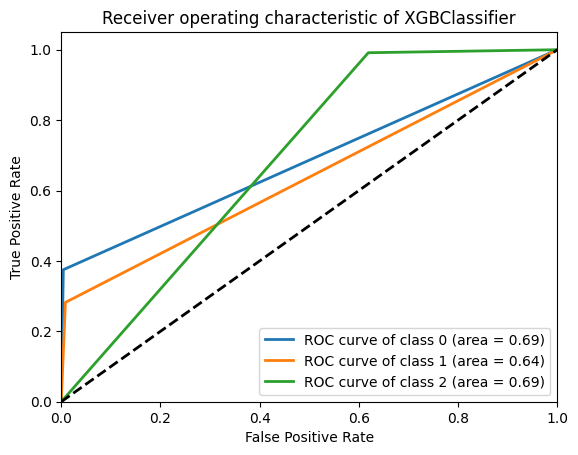

In [77]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of XGBClassifier')
plt.legend(loc="lower right")
plt.show()

**We can see that XGBoost is performing better in predicting all the classes.**

# **Week 3 & 4: Model Selection and Advanced Techniques**
**Multi-class SVM**

In [78]:
from sklearn.svm import SVC

In [79]:
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0).fit(x_train, y_train)
y_pred=svc.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

[[ 13   3   8]
 [  5  15  19]
 [ 20  55 862]]
              precision    recall  f1-score   support

           0       0.34      0.54      0.42        24
           1       0.21      0.38      0.27        39
           2       0.97      0.92      0.94       937

    accuracy                           0.89      1000
   macro avg       0.51      0.62      0.54      1000
weighted avg       0.92      0.89      0.91      1000

accuracy :  89.0


0.7427300096016298


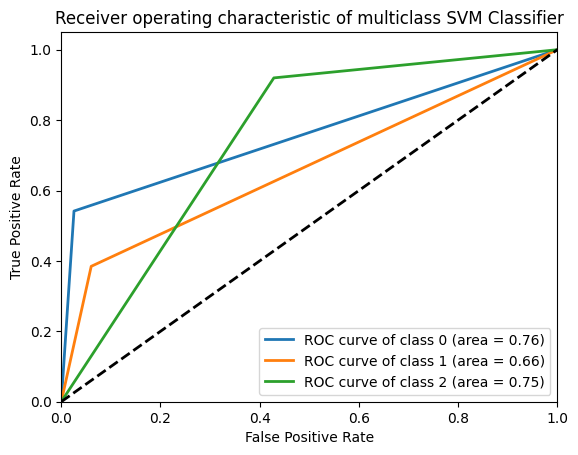

In [80]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of multiclass SVM Classifier')
plt.legend(loc="lower right")
plt.show()

# **Neural Network**

In [81]:
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import class_weight
from sklearn.preprocessing import label_binarize
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Dropout,GRU
from keras.models import Sequential
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler

In [82]:
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])

In [83]:
classifier = Sequential()
classifier.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dense(units=80,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=80,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
#Compile and Run
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,verbose=0)
#Evaluate
y_pred = classifier.predict(x_val1, batch_size=256)

y_pred_bool = np.argmax(y_pred, axis=1)
# label
y_test = np.argmax(y_val1, axis=1)

print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[  4   9  11]
 [  0  11  28]
 [  0   4 933]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        24
           1       0.46      0.28      0.35        39
           2       0.96      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.81      0.48      0.54      1000
weighted avg       0.94      0.95      0.94      1000



In [84]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train1),
                                                  y=y_train1)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 14.6, 1: 8.316455696202532, 2: 0.35571196534921495}

In [85]:
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,class_weight=class_weight_dict,verbose=0)
y_pred = classifier.predict(x_val1, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[ 10   6   8]
 [  0  16  23]
 [  0  31 906]]
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.30      0.41      0.35        39
           2       0.97      0.97      0.97       937

    accuracy                           0.93      1000
   macro avg       0.76      0.60      0.63      1000
weighted avg       0.94      0.93      0.93      1000



class-weights does not improve the performance

In [86]:
#using dropouts
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,class_weight=class_weight_dict,verbose=0)
y_pred = classifier.predict(x_val1, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001FA362B0C20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[ 24   0   0]
 [ 39   0   0]
 [937   0   0]]
              precision    recall  f1-score   support

           0       0.02      1.00      0.05        24
           1       0.00      0.00      0.00

In [87]:
y_train3 = label_binarize(y_train, classes=[0, 1, 2])

In [88]:
#for over-sampled data
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train.shape[1]))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=150,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train,y_train3,batch_size=256,epochs=10,verbose=0)
y_pred = classifier.predict(x_val, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[  9   8   7]
 [  2  21  16]
 [  5 135 797]]
              precision    recall  f1-score   support

           0       0.56      0.38      0.45        24
           1       0.13      0.54      0.21        39
           2       0.97      0.85      0.91       937

    accuracy                           0.83      1000
   macro avg       0.55      0.59      0.52      1000
weighted avg       0.93      0.83      0.87      1000



Using Over-sampled data for neural network does not improve the performance

# **Sentiment Score**

In [90]:
!pip install textblob

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/624.3 kB 330.3 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/624.3 kB 330.3 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/624.3 kB 585.1 kB/s eta 0:00:01
   -------------- ------------------------- 225.3/624.3 kB 1.1 MB/s eta 0:00:01
   ------------------ --------------------- 286.7/624.3 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 358.4/624.3 kB 1.2 MB/s eta 0:00:01
   ---------------------------- ----------- 440.3/624.3 kB 1.3 MB/s eta 0:00:01
   --------------------------------- ------ 522.2/624.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/624.3 kB 1.2 MB/s eta 0:00:01
   --

In [91]:
from textblob import TextBlob
def senti(x):
    return TextBlob(x).sentiment
def polarity(x):
    return TextBlob(x).polarity+1

train['senti_score'] = train['reviews.text'].apply(senti)
test_val['senti_score'] = test_val['reviews.text'].apply(senti)

train['polarity'] =train['reviews.text'].apply(polarity)
test_val['polarity'] = test_val['reviews.text'].apply(polarity)

train.senti_score.head()

0     (0.37479166666666663, 0.6791666666666667)
1    (0.45821428571428574, 0.49821428571428567)
2                    (0.69, 0.6033333333333335)
3                              (0.1875, 0.4375)
4                   (0.6000000000000001, 0.725)
Name: senti_score, dtype: object

In [92]:
Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment','senti_score','Name'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment','senti_score','Name'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
y_val = test_val['sentiment']

In [93]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

[[ 13   2   9]
 [  3  15  21]
 [  8  71 858]]
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        24
           1       0.17      0.38      0.24        39
           2       0.97      0.92      0.94       937

    accuracy                           0.89      1000
   macro avg       0.56      0.61      0.57      1000
weighted avg       0.92      0.89      0.90      1000

88.6
0.9597545569391807
0.886


Sentiment Score does not have much affect on the performance

# **Project Task: Week 4**

# LSTM

In [94]:
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
epochs = 4
emb_dim = 128
batch_size = 256
model = Sequential()
model.add(Embedding(5000, emb_dim, input_length=x_train1.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size)
y_pred = model.predict(x_val1, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)

print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

Epoch 1/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 750s 46s/step - accuracy: 0.7140 - loss: 0.8532
Epoch 2/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 690s 44s/step - accuracy: 0.9345 - loss: 0.3083
Epoch 3/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 708s 45s/step - accuracy: 0.9331 - loss: 0.3150
Epoch 4/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 740s 47s/step - accuracy: 0.9406 - loss: 0.2787
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



In [95]:
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
                                                  classes=np.unique(y_train1),
                                                  y=y_train1)
   
class_weights_dict = dict(enumerate(class_weights))
emb_dim = 128                                                 
epochs = 4
batch_size = 256
model = Sequential()
model.add(Embedding(x_train1.shape[1], emb_dim, input_length=x_train1.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size,class_weight=class_weights_dict)
y_pred = model.predict(x_val1, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

Epoch 1/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 885s 56s/step - acc: 0.4033 - loss: 1.0635
Epoch 2/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 1113s 71s/step - acc: 0.3847 - loss: 1.0307
Epoch 3/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 1565s 98s/step - acc: 0.3385 - loss: 1.0991
Epoch 4/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 1780s 111s/step - acc: 0.3361 - loss: 1.1277
10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



In [96]:
y_train2 = label_binarize(y_train, classes=[0, 1, 2])
emb_dim = 128                                                 
epochs = 3
batch_size = 256
model = Sequential()
model.add(Embedding(x_train.shape[1], emb_dim, input_length=x_train.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train, y_train2, epochs=epochs, batch_size=batch_size)
y_pred = model.predict(x_val, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

Epoch 1/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 4918s 112s/step - acc: 0.3261 - loss: 1.1111
Epoch 2/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 5406s 123s/step - acc: 0.3282 - loss: 1.1076
Epoch 3/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 5625s 128s/step - acc: 0.3424 - loss: 1.1037
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



# GRU

In [97]:
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
epochs = 3
emb_dim = 128
batch_size = 256
model = Sequential()
model.add(Embedding(x_train1.shape[1], emb_dim, input_length=x_train1.shape[1]))
#model.add(SpatialDropout1D(0.7))
model.add(GRU(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size)
y_pred = model.predict(x_val1, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 5324s 332s/step - acc: 0.2956 - loss: nan
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 5416s 338s/step - acc: 0.0243 - loss: nan
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 5563s 347s/step - acc: 0.0216 - loss: nan
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step
[[ 24   0   0]
 [ 39   0   0]
 [937   0   0]]
              precision    recall  f1-score   support

           0       0.02      1.00      0.05        24
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00       937

    accuracy                           0.02      1000
   macro avg       0.01      0.33      0.02      1000
weighted avg       0.00      0.02      0.00      1000



We can see from above that LSTM and GPU models are not efficient in predicting minor classes. ANN is performing quite good in solving class imbalance problem but it cannot beat traditional ML agorithms.

In [98]:
print(words[250:300])

['disappoint' 'discov' 'display' 'distract' 'doe' 'doesnt' 'dollar' 'dont'
 'door' 'doorbel' 'dot' 'doubl' 'downfal' 'download' 'downsid' 'drain'
 'drawback' 'drive' 'drop' 'durabl' 'dure' 'earli' 'earlier' 'eas' 'easi'
 'easier' 'easili' 'ebook' 'echo' 'edg' 'edit' 'educ' 'effect' 'effici'
 'effort' 'electron' 'els' 'email' 'employe' 'enabl' 'end' 'endless'
 'enjoy' 'enlarg' 'entertain' 'entir' 'entri' 'environ' 'equip' 'eread']


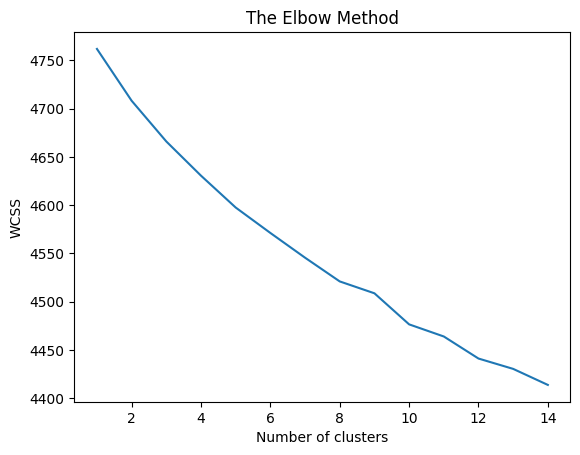

In [99]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(reviews)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As no proper elbow is generated, I will have to select right amount of clusters by trial and error. So, I will showcase the results of different amount of clusters to find out the right amount of clusters.

11 Clusters

In [100]:
kmeans = KMeans(n_clusters = 11, n_init = 20) 
kmeans.fit(reviews)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : great, work, love, like, veri, good, screen, devic, time, doe, just, sound, use, purchas, amazon, need, music, better, app, realli, price, thing, want, light, nice
1 : love, bought, gift, christma, year, absolut, purchas, daughter, great, grandson, birthday, wife, tablet, granddaught, perfect, work, gave, famili, veri, price, parent, like, grandkid, nephew, good
2 : game, play, love, tablet, read, book, watch, year, great, video, enjoy, grandson, bought, download, daughter, easi, app, movi, learn, educ, good, internet, granddaught, purchas, kindl
3 : easi, veri, love, great, tablet, bought, purchas, year, work, navig, happi, realli, daughter, setup, oper, item, sound, child, good, read, amazon, enjoy, grandson, fast, super
4 : product, great, recommend, good, price, veri, easi, love, work, best, friend, amazon, servic, nice, qualiti, purchas, awesom, definit, realli, high, excel, home, enjoy, famili, like
5 : kindl, love, read, great, upgrad, better, replac, purchas, best, veri, ye

13 Clusters

In [101]:
kmeans = KMeans(n_clusters = 13, n_init = 20) 
kmeans.fit(reviews)
# We look at 13 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : veri, easi, happi, good, product, love, great, tablet, purchas, grandson, qualiti, friend, learn, recommend, child, bought, help, best, amazon, work, satisfi, pleas, use, durabl, enjoy
1 : echo, plus, great, amazon, love, sound, music, video, home, like, devic, work, product, smart, better, light, hous, screen, featur, bulb, easi, famili, alexa, purchas, addit
2 : book, read, game, love, kindl, great, easi, purchas, play, reader, like, size, perfect, just, light, watch, tablet, need, download, carri, want, good, devic, screen, favorit
3 : kindl, love, read, great, upgrad, best, better, model, screen, second, easi, bought, purchas, replac, size, veri, light, like, year, origin, use, version, tablet, charg, book
4 : kid, great, tablet, love, easi, app, good, game, amazon, price, play, awesom, parent, entertain, time, free, bought, recommend, learn, littl, like, kindl, adult, product, grandson
5 : gift, love, christma, bought, purchas, great, wife, tablet, perfect, absolut, gave, easi

# Topic Modelling

In [102]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
# Tweak the two parameters below
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(reviews)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, tvec3, number_words)

Topics found via LDA:

Topic #0:
echo alexa music love great home amazon video devic light

Topic #1:
book great easi kindl second read tablet featur memori card

Topic #2:
tablet great drop love work simpl kid bought just warranti

Topic #3:
screen sound great phone connect touch speaker work slow love

Topic #4:
game love tablet play year read book learn daughter easi

Topic #5:
easi veri tablet size love purchas nice read kindl great

Topic #6:
love gift bought christma great purchas tablet recommend friend happi

Topic #7:
great easi love good veri qualiti sound pictur everyday account

Topic #8:
read kindl batteri reader life book great like screen easi

Topic #9:
tablet great kid good price love child doe app product


The project successfully combined sentiment analysis, machine learning, and topic modeling to predict customer satisfaction.
The findings provide actionable insights for improving product features, marketing strategies, and customer experience.